In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

#kaggle.com -> veritabanları bulmak için

In [31]:
dataFrame = pd.read_excel("merc.xlsx")

In [32]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [33]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [34]:
dataFrame.isnull().sum() # hangi kolonda kaç null var olduğunu gösterir

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

## Veri Temizliği

C:\Users\behce\AppData\Local\Temp\ipykernel_3008\1202812281.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(dataFrame["price"]) #distplot -> verinin dağılım grafiğini gösterir


<AxesSubplot: xlabel='price', ylabel='Density'>

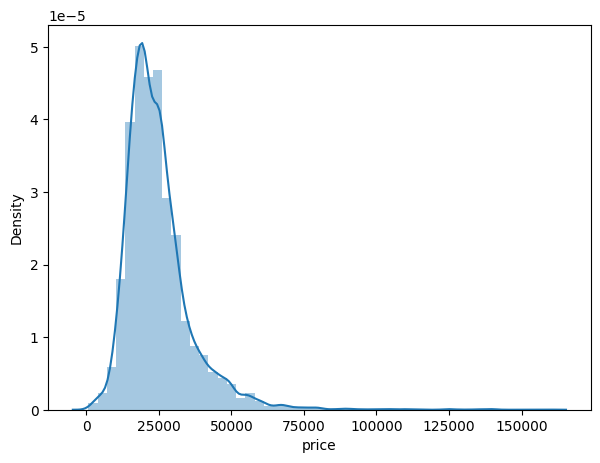

In [35]:
plt.figure(figsize=(7,5)) #seaborn matplotlib'in alt kütüphanesi olduğu için ortak çalışırlar.
sbn.distplot(dataFrame["price"]) #distplot -> verinin dağılım grafiğini gösterir

#bu inceleme sonucunda 75bin ve üzerindeki veriler çok az olduğu için bu veriler tahminlerimizde

<AxesSubplot: xlabel='year', ylabel='count'>

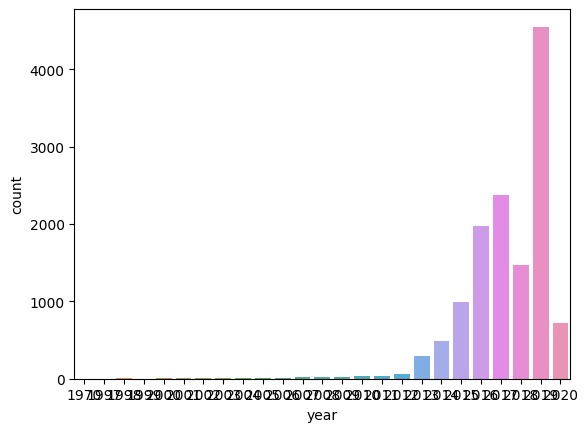

In [36]:
sbn.countplot(x=dataFrame["year"]) # countplot -> verinin bulunduğu araklıkta kaçar tane veri olduğunun grafiğini yapar

In [37]:
dataFrame.corr() # corr -> verilerin birbirleriyle olan ilişkisini inceler

C:\Users\behce\AppData\Local\Temp\ipykernel_3008\2890046233.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataFrame.corr() # corr -> verilerin birbirleriyle olan ilişkisini inceler


,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [38]:
dataFrame.corr()["price"].sort_values()

# Y = ax + b
#price verisinin diğer verilerle olan ilişkisini inceledik. Çünkü bizim aradığımız cevap fiyat bilgisidir. (Y)
#short_values -> oranları küçükten büyüğe dizer
#pozitif değerler fiyatı arttırır, negatifler ise azaltır. Oran pozitif büyürse fiyat artar, negatif büyürse fiyat azalır.
#fiyatı en çok yıl arttırır, en çok kilometresi azaltır

C:\Users\behce\AppData\Local\Temp\ipykernel_3008\24487478.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataFrame.corr()["price"].sort_values()


mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<AxesSubplot: xlabel='mileage', ylabel='price'>

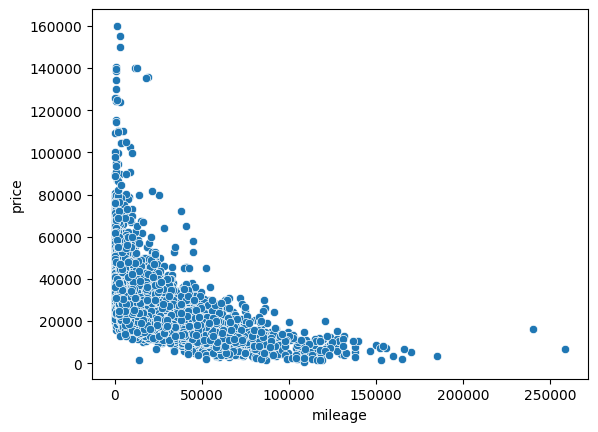

In [39]:
sbn.scatterplot(x="mileage",y="price",data=dataFrame) #kilometre arttırkça fiyat verisi azalıyor

In [40]:
dataFrame.sort_values("price",ascending=False).head(10) # fiyat verisi en yüksek olan ilk 10 veriyi getirir
#ascending, False olursa en düşük verileri getirir

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [41]:
dataFrame.sort_values("price",ascending=True).head(10) 

,year,price,transmission,mileage,tax,mpg,engineSize
11816,2003,650,Manual,109090,235,40.0,1.4
12008,2010,1350,Manual,116126,145,54.3,2.0
11765,2000,1490,Automatic,87000,265,27.2,3.2
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11174,2001,1695,Automatic,108800,325,31.7,3.2
12710,2006,1695,Automatic,153000,300,33.6,1.8
12766,2004,1780,Automatic,118000,265,41.5,2.2
12009,2007,1800,Automatic,84000,200,42.8,1.5
11764,1998,1990,Automatic,99300,265,32.1,2.3


In [42]:
yeniDataFrame = dataFrame.sort_values("price", ascending=False).iloc[131:]
#burada veri setimizdeki azınlık yer oluşturan pahalı arabaları listemizden kaldırdık
#len(dataFrame) * 0.01 -> veri setinin yüzde 1'ini bulduk ve iloc kullarak en pahalıdan ucuza giden listede 131. index ve sonrasını aldık
#bu şekilde en pahalı ilk 131 araba listeden atıldı

In [43]:
yeniDataFrame

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0
...,...,...,...,...,...,...,...
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11765,2000,1490,Automatic,87000,265,27.2,3.2
12008,2010,1350,Manual,116126,145,54.3,2.0


C:\Users\behce\AppData\Local\Temp\ipykernel_3008\1217872483.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(yeniDataFrame["price"])
C:\Users\behce\AppData\Local\Temp\ipykernel_3008\1217872483.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(dataFrame["price"])


<AxesSubplot: xlabel='price', ylabel='Density'>

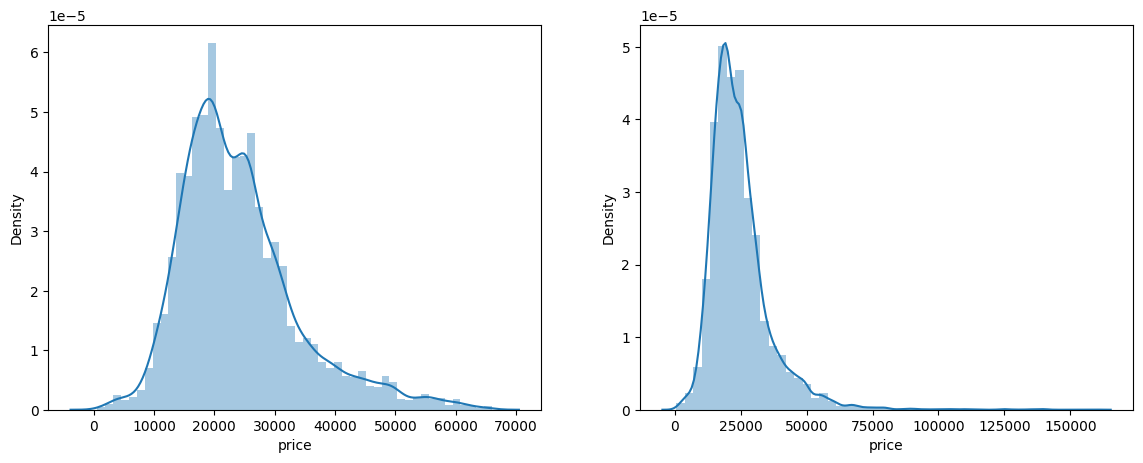

In [44]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sbn.distplot(yeniDataFrame["price"])

plt.subplot(1,2,2)
sbn.distplot(dataFrame["price"])
 
# yeni verimizde artık daha düzgün fazlalık veriler gözüküyor

In [45]:
dataFrame.groupby("year").mean()["price"] #dataFrame'i yıllara göre listeledik ve bu yıllardaki fiyat verilerinin ort. hesapladık

C:\Users\behce\AppData\Local\Temp\ipykernel_3008\331426360.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataFrame.groupby("year").mean()["price"] #dataFrame'i yıllara göre listeledik ve bu yıllardaki fiyat verilerinin ort. hesapladık


year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [46]:
yeniDataFrame.groupby("year").mean()["price"]

C:\Users\behce\AppData\Local\Temp\ipykernel_3008\1034697591.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yeniDataFrame.groupby("year").mean()["price"]


year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [47]:
dataFrame = yeniDataFrame #arındırılmış dataFrame'mimizi orjinale eşitledik

In [48]:
dataFrame = dataFrame[dataFrame.year != 1970] #sorun çıkartan yılı dataFrame'den attık

In [49]:
dataFrame.groupby("year").mean()["price"]

C:\Users\behce\AppData\Local\Temp\ipykernel_3008\2092793654.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataFrame.groupby("year").mean()["price"]


year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [50]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


In [51]:
dataFrame = dataFrame.drop("transmission", axis=1) #numerik değer olmayan kolonu attık

In [52]:
dataFrame.head()

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0


In [58]:
# y = ax + b
y = dataFrame["price"].values
x = dataFrame.drop("price", axis=1).values #price kolonu hariç tüm kolonlardaki verileri aldı

In [59]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650], dtype=int64)

In [60]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [61]:
from sklearn.model_selection import train_test_split

In [64]:
x_train, x_test , y_train , y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [67]:
x_train.shape

(9090, 5)

In [68]:
x_test.shape

(3897, 5)

In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
scaler = MinMaxScaler()

In [73]:
x_train = scaler.fit_transform(x_train) # fit ve transformu aynı satırda yapar

In [74]:
x_test = scaler.transform(x_test)

In [75]:
x_train

array([[0.82608696, 0.07228985, 0.03448276, 0.30619796, 0.33870968],
       [0.86956522, 0.22407036, 0.25      , 0.27890842, 0.32258065],
       [0.82608696, 0.11663365, 0.05172414, 0.29879741, 0.32258065],
       ...,
       [0.65217391, 0.25115541, 0.21551724, 0.27890842, 0.29032258],
       [0.73913043, 0.11981513, 0.34482759, 0.18408881, 0.32258065],
       [0.86956522, 0.06027436, 0.40517241, 0.20212766, 0.35483871]])

In [78]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [80]:
model = Sequential()

model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [81]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=250 ,epochs=300)
#validation_data -> modeli eğittikten sonra doğruluğu ölçtmek için test verilrini otomatik kıyas yapar
#batch_size -> verileri 250'şer olarak verir. Böylece model yorulmaz ama işlem uzar

Epoch 1/300
37/37 [==============================] - 1s 13ms/step - loss: 672134528.0000 - val_loss: 688084608.0000
Epoch 2/300
37/37 [==============================] - 0s 3ms/step - loss: 672089024.0000 - val_loss: 688007360.0000
Epoch 3/300
37/37 [==============================] - 0s 3ms/step - loss: 671958528.0000 - val_loss: 687784704.0000
Epoch 4/300
37/37 [==============================] - 0s 3ms/step - loss: 671578624.0000 - val_loss: 687156928.0000
Epoch 5/300
37/37 [==============================] - 0s 4ms/step - loss: 670566400.0000 - val_loss: 685563968.0000
Epoch 6/300
37/37 [==============================] - 0s 3ms/step - loss: 668158464.0000 - val_loss: 681962880.0000
Epoch 7/300
37/37 [==============================] - 0s 4ms/step - loss: 663008000.0000 - val_loss: 674589056.0000
Epoch 8/300
37/37 [==============================] - 0s 3ms/step - loss: 652988544.0000 - val_loss: 660901760.0000
Epoch 9/300
37/37 [==============================] - 0s 3ms/step - loss: 635147

In [82]:
kayipVerisi = pd.DataFrame(model.history.history)

In [83]:
kayipVerisi.head()

,loss,val_loss
0,672134528.0,688084608.0
1,672089024.0,688007360.0
2,671958528.0,687784704.0
3,671578624.0,687156928.0
4,670566400.0,685563968.0


<AxesSubplot: >

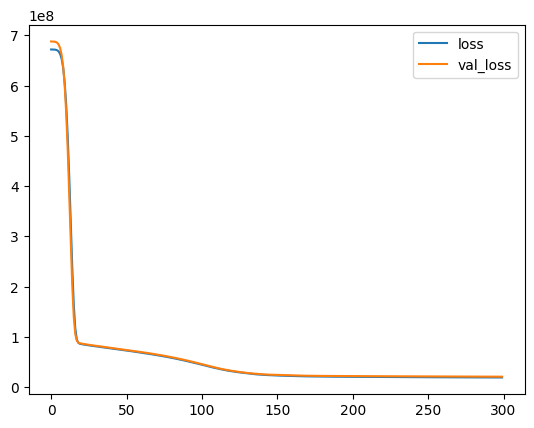

In [85]:
kayipVerisi.plot() #val_loss(test kaybı) ve loss(train) birlkte hareket etmeleri iyiye işarettir

In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [87]:
tahminDizisi = model.predict(x_test)

122/122 [==============================] - 0s 1ms/step


In [88]:
tahminDizisi

array([[22230.273],
       [23280.129],
       [24694.041],
       ...,
       [26072.555],
       [12391.885],
       [24530.73 ]], dtype=float32)

In [89]:
mean_absolute_error(y_test, tahminDizisi)

3201.7546967468966

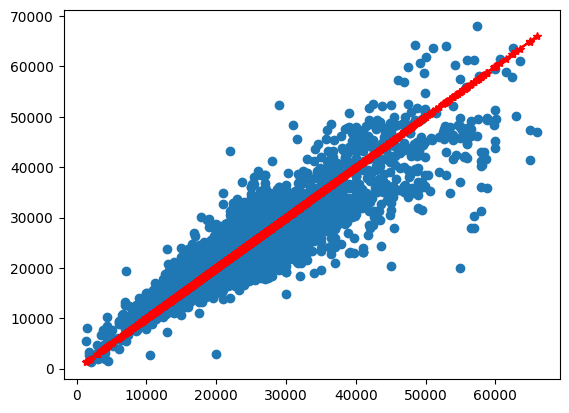

In [92]:
plt.scatter(y_test, tahminDizisi)
plt.plot(y_test, y_test, "r-*")